# Dataset: Employee Future Prediction

Acerca del conjunto de datos: <br/>
El departamento de recursos humanos de una empresa desea predecir si algunos empleados abandonarán la empresa en los próximos 2 años.

[Dataset en Kaggle](https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction)

In [1]:
# Importaciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Leer el dataset
empleados = pd.read_csv('../data/Employee.csv')
empleados.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


(Sebastian)
## Descripción de las variables y exploración inicial del dataset


##### Variables: 

- Education(Educación): ['Bachelors', 'Masters', 'PHD']

- JoinYear(Año de incorporación/Contratación)

- City (Ciudad) :  ['Bangalore', 'Pune', 'New Delhi']

- PaymentTier [1 : Alto , 2 : Medio , 3: Bajo]: Nivel de ingreso

- Age(Edad)

- Gender(Genero): ['Male', 'Female']

- EverBenched() : ['No', 'Yes'] -> Alguna vez se mantuvo fuera de los proyectos por 1 mes o más.

- ExperienceInCurrentDomain(Experiencia en el campo actual) [0 .. 7]

- LeaveOrNot: [0, 1] Tiene pensado dejar la empresa en los proximos 2 años.

##### Tipos de datos de las variables

In [3]:
empleados.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

##### Información mas detallada del dataset y sus datos

In [4]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


#### Limpieza del dataset

In [5]:
# Corroboramos que no haya datos nulos.
empleados.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

No hay valores nulos

In [6]:
# Corroboramos que no haya registros duplicados
empleados.duplicated().sum()

1889

Hay 1889 duplicados, los vamos a eliminar.

In [7]:
# Eliminando registros duplicados
empleados = empleados.drop_duplicates()

### Análisis Exploratorio

Trazamos histogramas de variables numéricas, para entender cómo se distribuyen en el conjunto de datos. 

Esto puede ayudarnos a identificar sesgos o patrones interesantes.

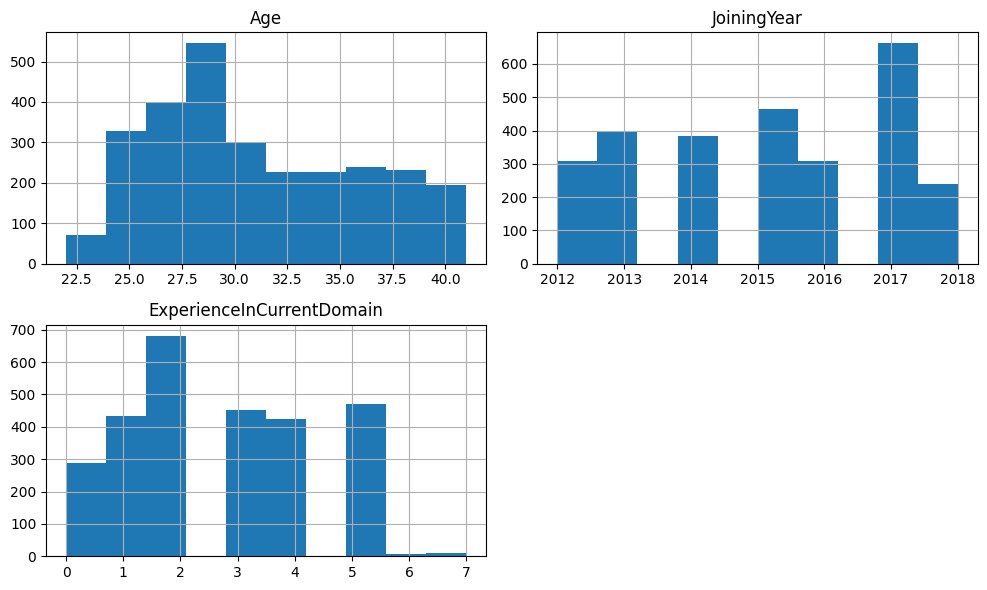

In [8]:
empleados[['Age', 'JoiningYear', 'ExperienceInCurrentDomain']].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

##### Calculamos la cantidad de empleados por ciudad.


In [9]:
empleados_por_ciudad = empleados['City'].value_counts()
empleados_por_ciudad

City
Bangalore    1171
Pune          801
New Delhi     792
Name: count, dtype: int64

##### Calculamos la cantidad de empleados por género.

In [10]:
empleados_por_genero = empleados['Gender'].value_counts()
empleados_por_genero

Gender
Male      1529
Female    1235
Name: count, dtype: int64

##### Calculamos la cantidad de empleados por nivel de ingreso.

In [11]:
cantidad_empleados_por_nivel_ingreso = empleados.groupby('PaymentTier')['Age'].count()
print(cantidad_empleados_por_nivel_ingreso)

PaymentTier
1     218
2     570
3    1976
Name: Age, dtype: int64


##### Distribución de empleados por nivel educativo.

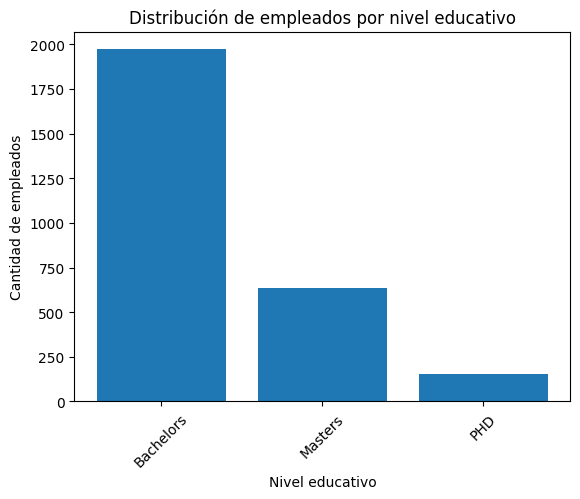

In [12]:
educacion_counts = empleados['Education'].value_counts()

plt.bar(educacion_counts.index, educacion_counts.values)
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad de empleados')
plt.title('Distribución de empleados por nivel educativo')
plt.xticks(rotation=45)
plt.show()

##### Proporción de empleados que planean dejar la empresa en los próximos 2 años según el género.


In [13]:
tasa_rotacion_por_genero = empleados.groupby('Gender')['LeaveOrNot'].mean()
print(tasa_rotacion_por_genero)

Gender
Female    0.497166
Male      0.310007
Name: LeaveOrNot, dtype: float64


##### Proporción de empleados que alguna vez se mantuvieron fuera de proyectos por 1 mes o más.

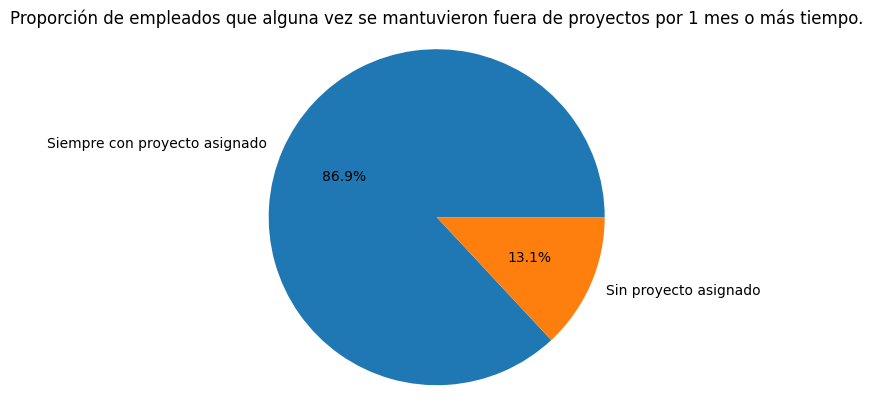

In [14]:
event_benched_counts = empleados['EverBenched'].value_counts()
labels = ['Siempre con proyecto asignado', 'Sin proyecto asignado']
plt.pie(event_benched_counts, labels=labels, autopct='%1.1f%%')
plt.title('Proporción de empleados que alguna vez se mantuvieron fuera de proyectos por 1 mes o más tiempo.')
plt.axis('equal')
plt.show()

##### Distribución de edad de los empleados


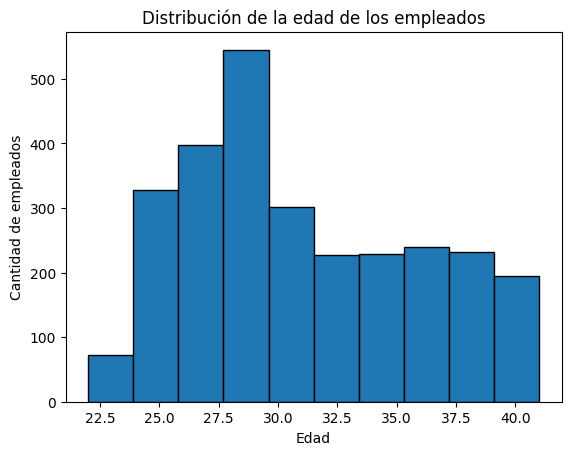

In [16]:
plt.hist(empleados['Age'], bins=10, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Cantidad de empleados')
plt.title('Distribución de la edad de los empleados')
plt.show()

##### Nivel de ingreso promedio de los empleados por género y nivel educativo

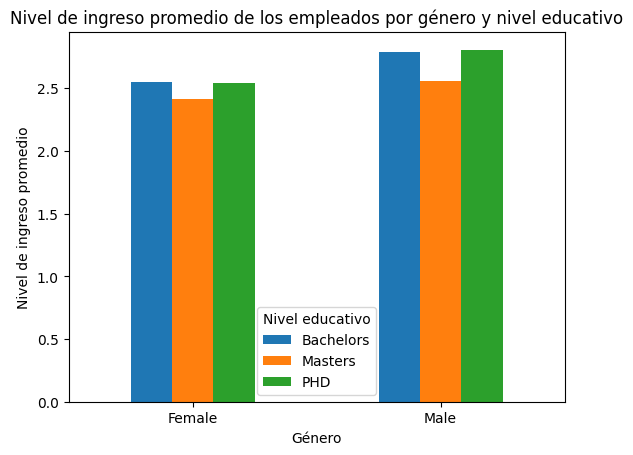

In [17]:
nivel_ingreso_genero_educacion = empleados.groupby(['Gender', 'Education'])['PaymentTier'].mean().unstack()

nivel_ingreso_genero_educacion.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Nivel de ingreso promedio')
plt.title('Nivel de ingreso promedio de los empleados por género y nivel educativo')
plt.legend(title='Nivel educativo')
plt.xticks(rotation=0)
plt.show()

(Aldana)
## Medidas de concentración sobre edad (Age)

In [18]:
# Establecer la precisión y formato de visualización
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Mostrar el resumen estadístico
descripcion = empleados['Age'].describe()
print(descripcion)

count   2764.00
mean      30.95
std        5.11
min       22.00
25%       27.00
50%       30.00
75%       35.00
max       41.00
Name: Age, dtype: float64


In [19]:
#Calcular la mediana
mediana = empleados['Age'].median()
print("Mediana:", mediana)

Mediana: 30.0


In [20]:
#Calcular la moda
moda = empleados['Age'].mode().iloc[0]
print("Moda:", moda)

Moda: 28


In [21]:
#Calcular la media
media = empleados['Age'].mean()
print("Media:", media)

Media: 30.952966714905934


In [22]:
#Calcular el valor minimo
minimo = empleados['Age'].min()
print("Minimo:", minimo)

Minimo: 22


In [23]:
#Calcular el maximo
maximo = empleados['Age'].max()
print("Maximo:", maximo)

Maximo: 41


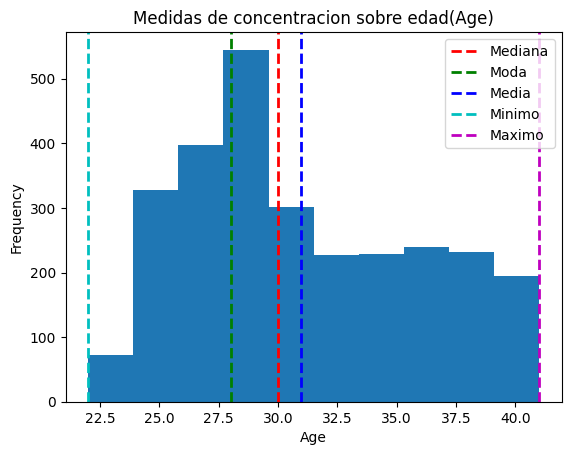

In [24]:
# Crea un histograma de la columna 'Age'
plt.hist(empleados['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Medidas de concentracion sobre edad(Age)')

# Agrega líneas verticales para representar la media, moda, mediana, mínimo y máximo
plt.axvline(mediana, color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(moda, color='g', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(media, color='b', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(minimo, color='c', linestyle='dashed', linewidth=2, label='Minimo')
plt.axvline(maximo, color='m', linestyle='dashed', linewidth=2, label='Maximo')

# Agrega una leyenda
plt.legend()

plt.show()

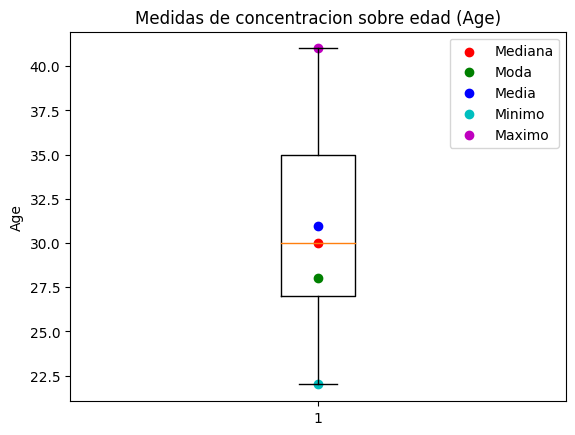

In [25]:
# Crea un diagrama de caja de la columna 'Age'
plt.boxplot(empleados['Age'])
plt.ylabel('Age')
plt.title('Medidas de concentracion sobre edad (Age)')

# Agrega puntos para representar la media, moda, mediana, mínimo y máximo
plt.scatter(1, mediana, color='r', label='Mediana')
plt.scatter(1, moda, color='g', label='Moda')
plt.scatter(1, media, color='b', label='Media')
plt.scatter(1, minimo, color='c', label='Minimo')
plt.scatter(1, maximo, color='m', label='Maximo')

# Agrega una leyenda
plt.legend()

plt.show()

(Agustin)
## Relación entre Genero (Gender) y Categoría de pago (PaymentTier) 

In [26]:
empleados.groupby(["PaymentTier", "Gender"])["Gender"].count()

PaymentTier  Gender
1            Female     115
             Male       103
2            Female     367
             Male       203
3            Female     753
             Male      1223
Name: Gender, dtype: int64

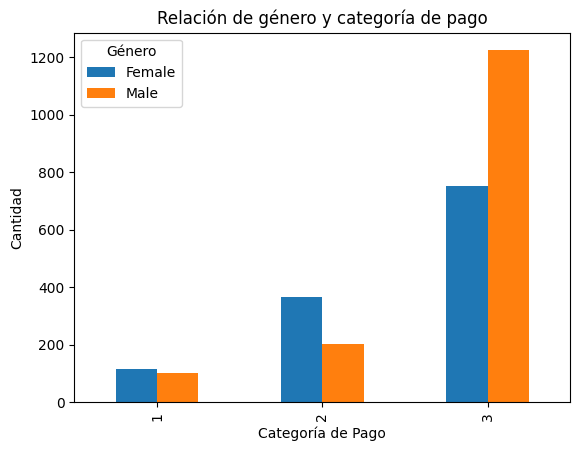

In [27]:
# Realizamos un gráfico de barras para visualizar la relación
category_gender_counts = empleados.groupby(['PaymentTier', 'Gender']).size().unstack()

category_gender_counts.plot(kind='bar')

plt.xlabel('Categoría de Pago')
plt.ylabel('Cantidad')
plt.title('Relación de género y categoría de pago')
plt.legend(title='Género')
plt.show()

Se puede ver que en las categorías 1 y 2, la mayoría pertenece al género femenimo. En cambio en la categoría 3, el género masculino supera ampliamente al femenino.

(Luis)
## Cálculo de la media y la moda de cada campo

In [28]:
# Obtener los tipos de datos de cada columna
tipos_datos = empleados.dtypes
print(tipos_datos)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


In [29]:
# Crear el diccionario de campos y tipos de datos
campos_tipos = {}
for campo, tipo_dato in tipos_datos.items():
    if tipo_dato == 'O':
        campos_tipos[campo] = "str"
    else:
        campos_tipos[campo] = tipo_dato.name

campos_tipos

{'Education': 'str',
 'JoiningYear': 'int64',
 'City': 'str',
 'PaymentTier': 'int64',
 'Age': 'int64',
 'Gender': 'str',
 'EverBenched': 'str',
 'ExperienceInCurrentDomain': 'int64',
 'LeaveOrNot': 'int64'}

Education
Moda: Bachelors

JoiningYear
Media: 2015.09
Mediana: 2015



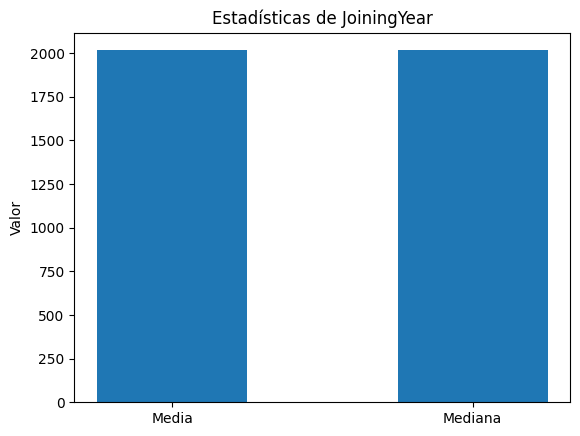

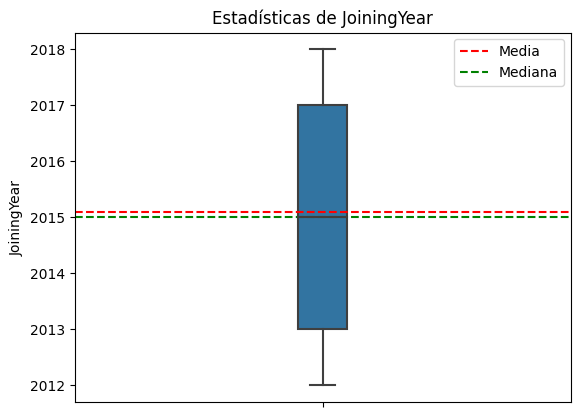

City
Moda: Bangalore

PaymentTier
Media: 2.64
Mediana: 3



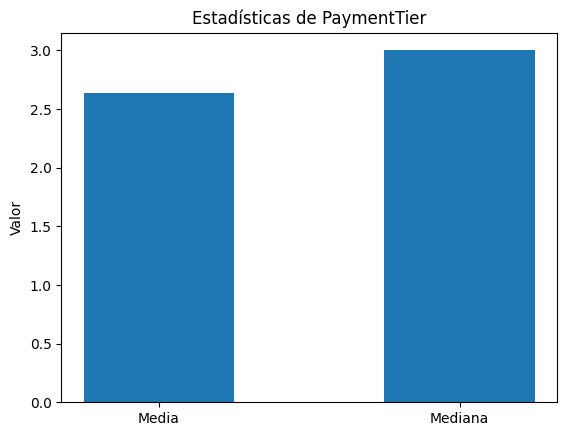

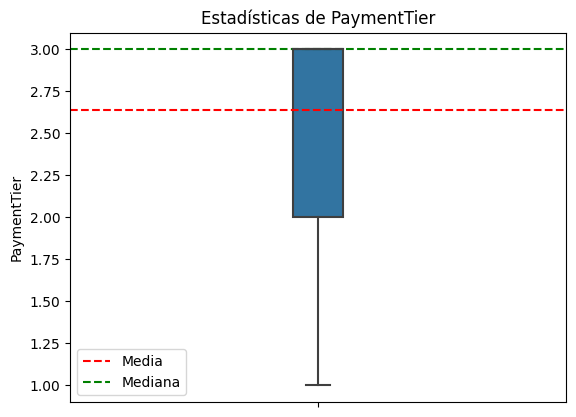

Age
Media: 30.95
Mediana: 30



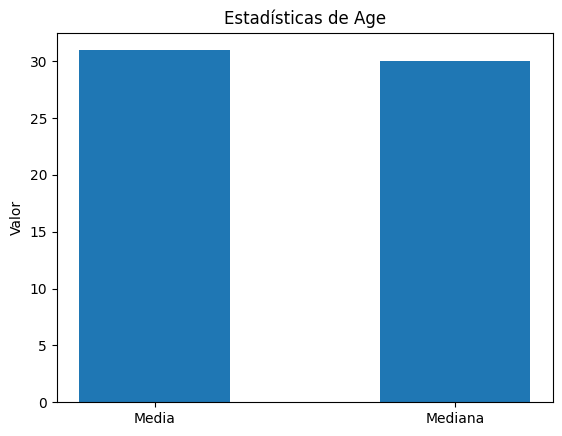

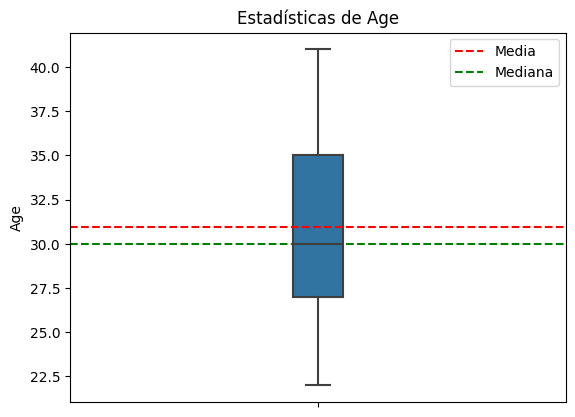

Gender
Moda: Male

EverBenched
Moda: No

ExperienceInCurrentDomain
Media: 2.64
Mediana: 2



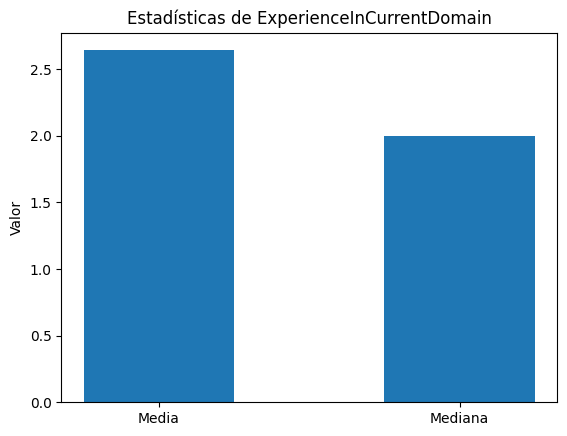

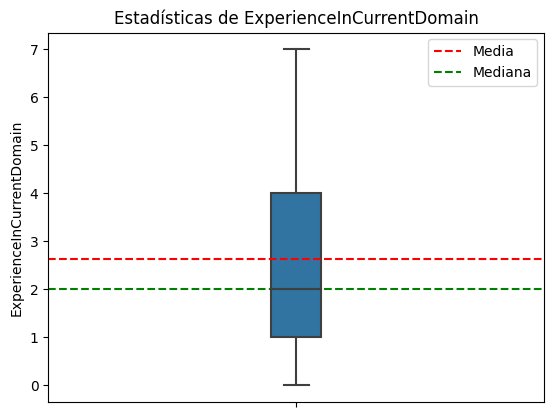

LeaveOrNot
Media: 0.39
Mediana: 0



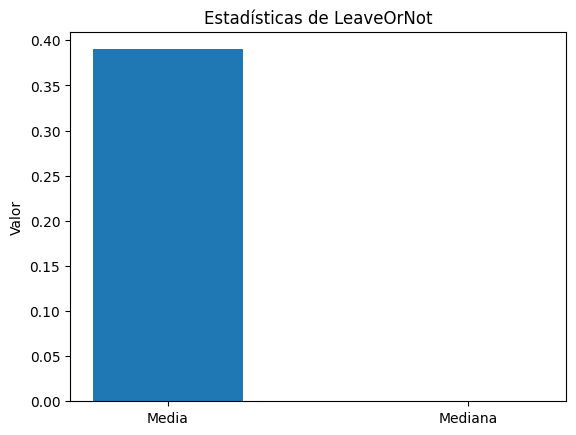

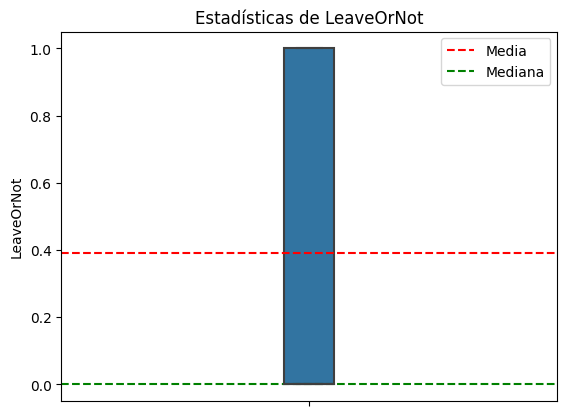

In [30]:
# Iterar sobre cada campo y calcular estadísticas
for campo, tipo_dato in campos_tipos.items():
    if tipo_dato == "str":
        moda = empleados[campo].mode().values[0]
        print(campo)
        print(f"Moda: {moda}")
        print()
    else:
        media = round(empleados[campo].mean(),2)
        mediana = int(empleados[campo].median())
        print(campo)
        print(f"Media: {media}")
        print(f"Mediana: {mediana}")
        print()
        
        fig, ax = plt.subplots()
        valores = [media, mediana]
        etiquetas = ['Media', 'Mediana']
        ax.bar(etiquetas, valores, width=0.5)
        ax.set_ylabel('Valor')
        ax.set_title(f'Estadísticas de {campo}')
        plt.show()

        plt.figure()
        sns.boxplot(data=empleados, y=campo, width=0.1)
        plt.axhline(media, color='red', linestyle='--', label='Media')
        plt.axhline(mediana, color='green', linestyle='--', label='Mediana')
        plt.legend()
        plt.title(f'Estadísticas de {campo}')
        plt.show()

(Martina)
## Relación entre Categoría de pago (PaymentTier) y Nivel de efuación (Education)

> Con este análisis, buscamos investigar si hay alguna relación entre el tipo de educación de un empleado con la categoría de pago en la que se encuentra.
>
> **Hipótesis**: Mayor educación → Categoría de pago más alta.


<table align='center'>
<tr>
<th> Educación </th>
<th> Categoría de pago </th>
</tr>
<tr>
<td>

- PhD = 1
- Masters = 2
- Bachelors = 3

PhD > Masters > Bachelors


</td>
<td>

- 1 (Categoría más alta)
- 2 
- 3 (Categoría más baja)

</td>
</tr>
</table>


##### Exploración del dataset

In [31]:
# Muestra del dataset
empleados.sample(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1408,Bachelors,2012,Bangalore,1,27,Male,No,5,1
854,Bachelors,2013,Pune,3,26,Female,Yes,4,0
3729,Bachelors,2012,Pune,2,32,Female,No,5,1
2706,Bachelors,2015,New Delhi,3,29,Male,No,1,0
1920,Bachelors,2014,Pune,2,28,Female,No,1,1
1458,Masters,2018,Bangalore,3,28,Male,No,2,1
104,Bachelors,2017,New Delhi,3,28,Male,No,2,0
4554,Bachelors,2015,Pune,3,28,Female,No,1,1
4372,Bachelors,2012,New Delhi,3,36,Male,No,3,0
4356,Masters,2012,Bangalore,3,31,Female,No,4,0


In [32]:
# Tipos de Educación
empleados['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [33]:
# Tipos de categoría de pago
empleados['PaymentTier'].unique()

array([3, 1, 2], dtype=int64)

In [34]:
# Cambiamos los tipos de educación por números para poder aplicar la función de correlación
# Los nuevos datos se agregan en una columna llamada EduNum

edu_num = {'Bachelors':3,
            'Masters':2,
            'PHD': 1}

empleados.loc[:,'EducationNumber'] = empleados['Education'].map(edu_num) 
empleados

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,EducationNumber
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,3
1,Bachelors,2013,Pune,1,28,Female,No,3,1,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,3
3,Masters,2016,Bangalore,3,27,Male,No,5,1,2
4,Masters,2017,Pune,3,24,Male,Yes,2,1,2
...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0,2
4647,Bachelors,2016,Pune,3,30,Male,No,2,0,3
4649,Masters,2013,Pune,2,37,Male,No,2,1,2
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,2


##### Análisis de correlación

In [35]:
# Seleccionamos las comunas con datos numéricos
empleados_num = empleados.select_dtypes(np.number)

corr_matrix = empleados_num.corr()

# Resaltamos la columna que nos interesa (Tipo de educación)
corr_matrix.style.apply(lambda x: ['background: mediumslateblue' if x.name == 'EducationNumber'  else '' for i in x], axis=0)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,EducationNumber
JoiningYear,1.000000,-0.053823,0.024445,-0.031228,0.150650,-0.113858
PaymentTier,-0.053823,1.000000,0.067514,-0.004602,-0.119891,0.071380
Age,0.024445,0.067514,1.000000,-0.053276,-0.114943,0.107324
ExperienceInCurrentDomain,-0.031228,-0.004602,-0.053276,1.000000,-0.021181,-0.043842
LeaveOrNot,0.150650,-0.119891,-0.114943,-0.021181,1.000000,-0.019661
EducationNumber,-0.113858,0.071380,0.107324,-0.043842,-0.019661,1.000000


In [36]:
# Correlación solo del tipo de educación con la categoría de pago
empleados[['EducationNumber', 'PaymentTier']].corr()

,EducationNumber,PaymentTier
EducationNumber,1.00,0.07
PaymentTier,0.07,1.00


**No se observa correlación.**

En la primer tabla podemos ver que el tipo de educación (EduNum) tiene correlación baja con la edad y correlación negativa baja con el año de ingreso, mientras que la categoría de pago tiene correlación negativa baja con LeaveOrNot.
Pero no existe correlación entre ellos.

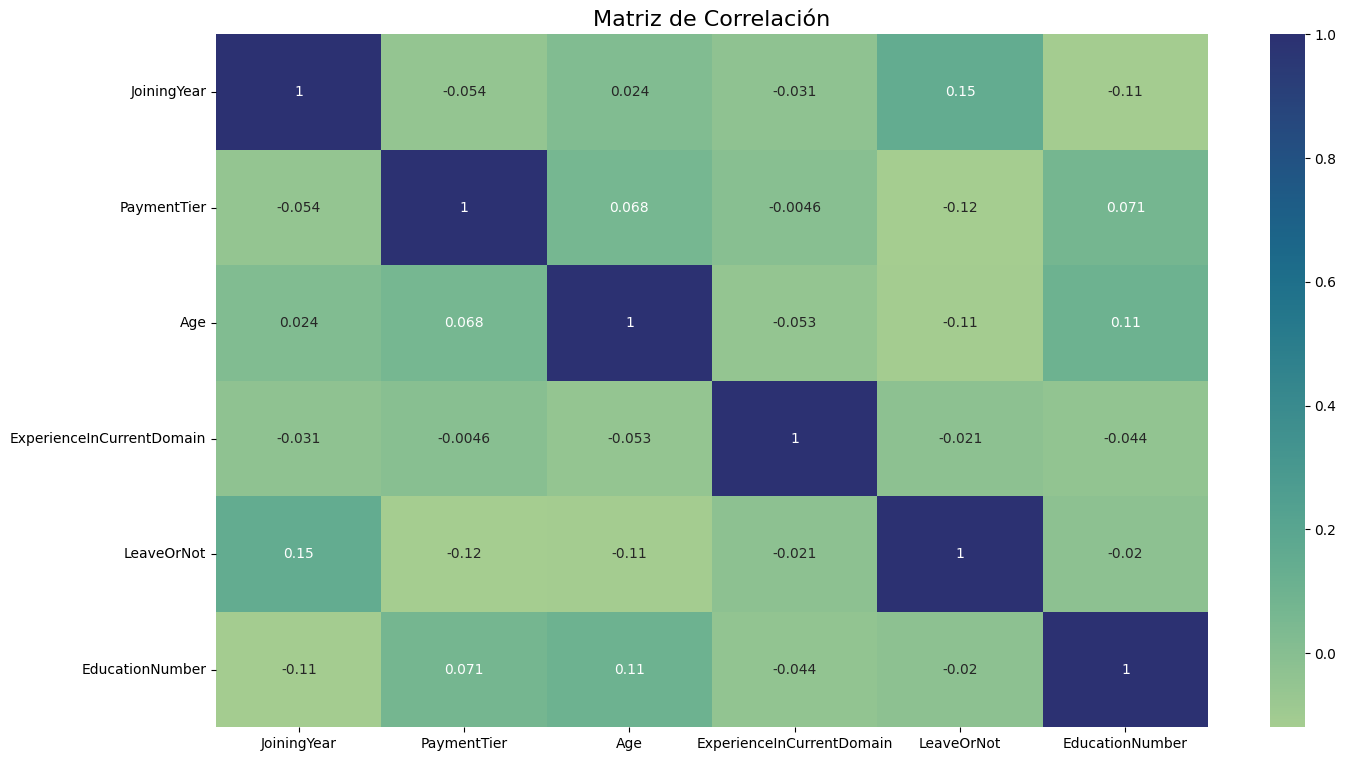

In [37]:
# Gráfico de Matriz de correlación
plt.figure(figsize=(16,9))
sns.heatmap(empleados_num.corr(),annot= True,cmap = 'crest')
plt.title('Matriz de Correlación', fontsize=16)

plt.show()

##### Análisis comparativo entre Education y PaymentTier

In [38]:
# Cantidad de empleados por cada tipo de educación
bachelors = len(empleados[(empleados['Education']=='Bachelors')])
masters = len(empleados[(empleados['Education']=='Masters')])
phd = len(empleados[(empleados['Education']=='PHD')])

print(f'CANTIDAD DE EMPLEADOS POR TIPO DE EDUCACIÓN\nBachelors: {bachelors}\nMasters: {masters}\nPHD: {phd}')

CANTIDAD DE EMPLEADOS POR TIPO DE EDUCACIÓN
Bachelors: 1971
Masters: 637
PHD: 156


In [39]:
# Cantidad de empleados por cada categoría de pago
cat1 = len(empleados[(empleados['PaymentTier']==1)])
cat2 = len(empleados[(empleados['PaymentTier']==2)])
cat3 = len(empleados[(empleados['PaymentTier']==3)])

print(f'CANTIDAD DE EMPLEADOS POR CATEGORÍA DE PAGO\nCategoría 1: {cat1}\nCategoría 2: {cat2}\nCategoría 3: {cat3}')

CANTIDAD DE EMPLEADOS POR CATEGORÍA DE PAGO
Categoría 1: 218
Categoría 2: 570
Categoría 3: 1976


In [40]:
# Agrupamos por tipo de educación y por categoría de pago
df = empleados.groupby(['Education', 'PaymentTier']).size().to_frame('EmployeeCount').reset_index()
education_count = df.groupby('Education')['EmployeeCount'].sum()

# Sacamos el porcentaje de cada subgrupo
df['Percentage'] = df.apply(lambda x: f'{(x["EmployeeCount"] / education_count[x["Education"]]) * 100:.2f}%', axis=1)

df.style.hide(axis='index')

Education,PaymentTier,EmployeeCount,Percentage
Bachelors,1,150,7.61%
Bachelors,2,336,17.05%
Bachelors,3,1485,75.34%
Masters,1,54,8.48%
Masters,2,215,33.75%
Masters,3,368,57.77%
PHD,1,14,8.97%
PHD,2,19,12.18%
PHD,3,123,78.85%


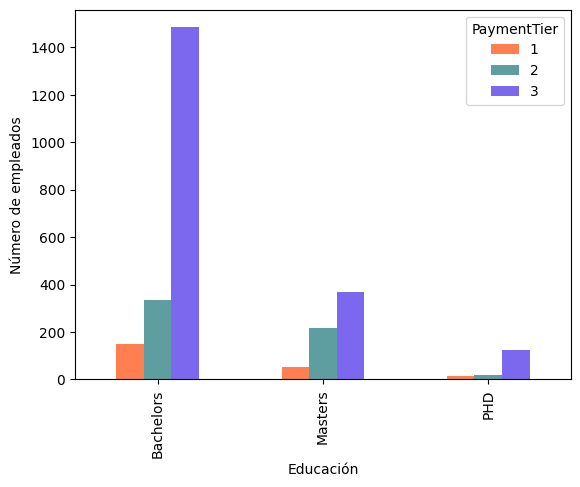

In [41]:
# Gráfico de barras para visualizar la distribución de "categoría de pago" por cada tipo de educación
colors = ['coral', 'cadetblue', 'mediumslateblue']

graf1 = empleados.groupby(['Education', 'PaymentTier']).size().unstack()
graf1.plot(kind='bar', color=colors)

plt.xlabel('Educación')
plt.ylabel('Número de empleados')
plt.show()

* Para los empleados con título de licenciatura (Bachelors), la mayoría se encuentra en la categoría 3, la más baja. Y menos del 25% se divide en las otras dos categorías.
* En el caso de los empleados con masters, las categorías se encuentran un poco más distribuídas. Un 57.77% en la categoría 3 y un 33% en la categoría 2.
* Para los empleados con doctorado (PHD) ocurre algo similar que en Bachelors.

##### Conclusión
---

> Luego de este análisis, podemos concluir que la hipótesis planteada, de que un mayor nivel de educación genere una categoría de pago mejor, no se cumple. 
> Como pudimos observar la mayoría de los empleados se encuentran en la categoría de pago más baja, independientemente del nivel de educación.

*Nota: Hay que tener en cuenta que la cantidad de empleados por cada nivel de educación es muy dispar lo que puede influir en los resultados  finales.

(Mariano)
## Gráficos 

##### Categoría de pago vs Dejaría la compañía. Gráfico con frecuencias, expresadas en %.

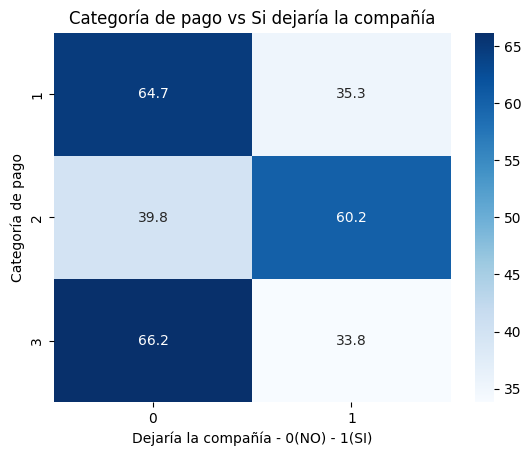

In [42]:
# Calcular los porcentajes sobre filas
tabla = empleados.groupby('PaymentTier')['LeaveOrNot'].value_counts(normalize=True).unstack() * 100

# Crear el mapa de calor utilizando seaborn
sns.heatmap(tabla, annot=True, fmt=".1f", cmap='Blues')

# Agregar etiquetas a los ejes
plt.xlabel('Dejaría la compañía - 0(NO) - 1(SI)')
plt.ylabel('Categoría de pago')

plt.title('Categoría de pago vs Si dejaría la compañía')

# Mostrar el mapa de calor
plt.show()

**Podemos observar en el gráfico que de las tres categorías de pago, en la Categoría 2 se evidencia que el 59.9% de los emplados podría dejar la empresa. Es un punto a tener en cuenta a la hora de tomar acciones. Cabe aclarar que en la categoría 2 se ubica el 19.7% del personal analizado, mientras que en la cat 3 está el 75.1% y en la 1 el 5.2%.**

##### Composición de personal por experiencia en el campo

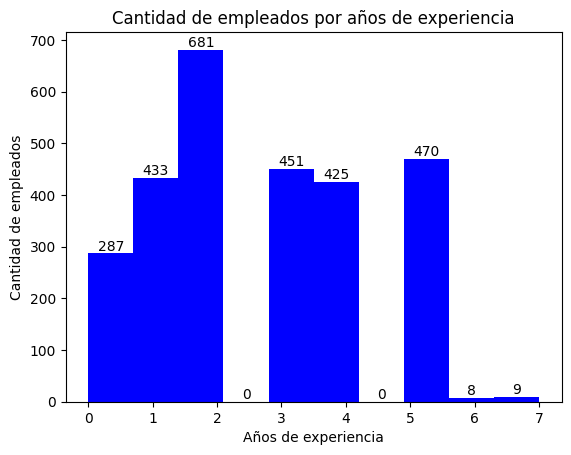

In [43]:
#006 Gráfico de composición de personal por experiencia en el campo#12

# Configuración del gráfico
fig, ax = plt.subplots()

# Crear histograma
ax.hist(empleados['ExperienceInCurrentDomain'], color="blue")

# Etiquetas de los ejes y título
ax.set_xlabel('Años de experiencia')
ax.set_ylabel('Cantidad de empleados')
ax.set_title('Cantidad de empleados por años de experiencia')

# Agregar etiquetas con las cantidades
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


# Mostrar el gráfico
plt.show()

**Se observa que la experiencia que más se repite entre los empleados, es de 2 años.**

##### Evolución de ingresos de personal por año

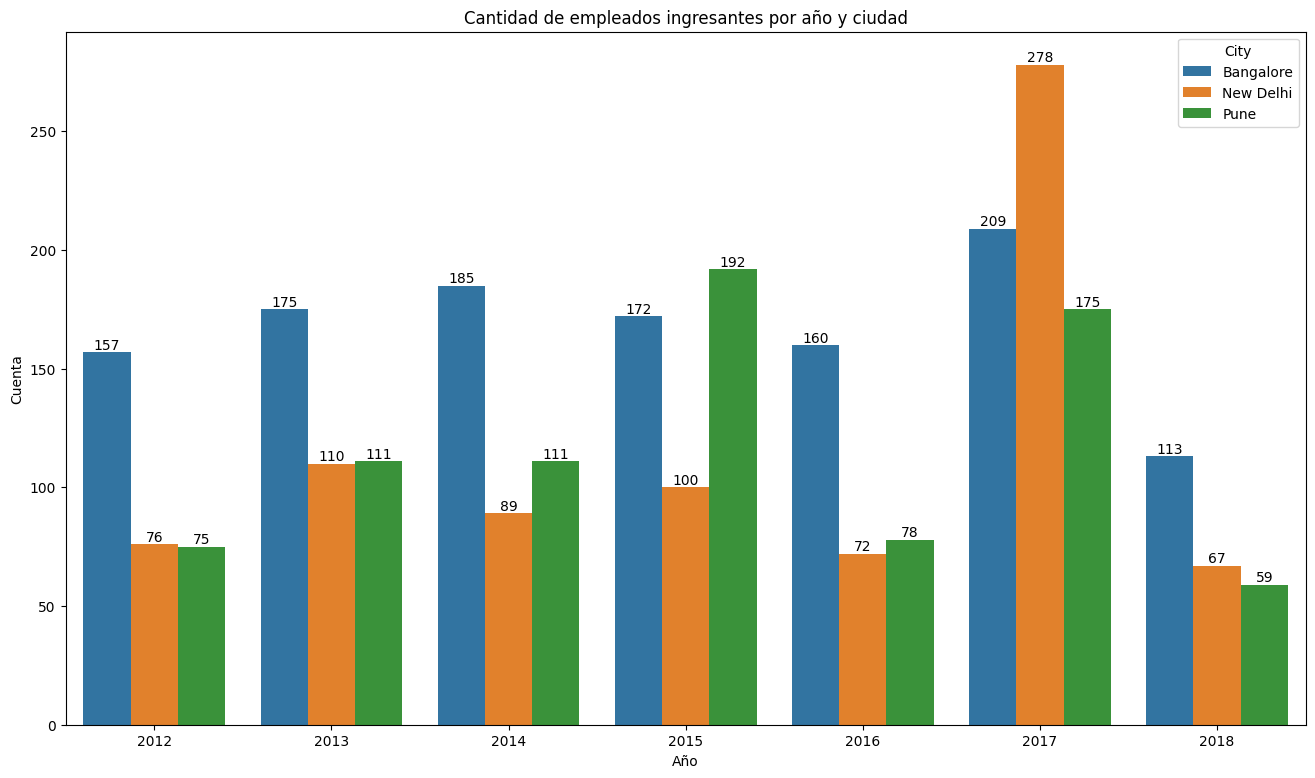

In [45]:
#007 Gráfico de evolución de ingresos de personal por año#13

plt.figure(figsize=(16,9))
tablaciudad = empleados.groupby(['City', 'JoiningYear']).size().reset_index(name='Count')

ax = sns.barplot(x='JoiningYear', y='Count', hue='City', data=tablaciudad)

plt.xlabel('Año')
plt.ylabel('Cuenta')
plt.title('Cantidad de empleados ingresantes por año y ciudad')

# Agregar etiquetas con las cantidades
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

**Se aprecia en 2017 el año con mayor cantidad de personas que ingresaron    
a la compañía, mientras que la ciudad donde más ingresaron ese año fue New Delhi.**

##### Gráfico de correlación de variables numéricas

In [ ]:
#011 Gráfico de correlación de variables numéricas con lib Seaborn#16

plt.figure(figsize=(16,9))
sns.heatmap(empleados.corr(),annot= True,cmap = 'crest')
plt.title('Correlación entre variables del dataset',fontsize=16)

plt.show()

**El nivel de pago (Payment Tier) y el año de ingreso(joiningyear) son las características que más correlación
tienen con la variable "Si dejaría la compañía"(Leaveornotva), no obstante la misma es baja.**